# Analysis of last.fm reports

Now we'll analyze the stats for my user, `fergomes`.

The first thing you need to do to perform this study is collect all the tracks for your user (or whatever user you want to analyze). This can be done running the python script `lastfm_get_user_historical_tracks.py` on this repo (go to the repo main page and go through the README).

For those who are not familiar, Last.fm is a service that collects and stores what you listen to on many devices. I use the service since 2006, and I had several connectors in the past, including Winamp!

On last.fm dialect, a `scrobble` is a unique track that was listened to on a period of time, and transferred to the platform.

To know more about the platform, check https://www.last.fm/.
If you feel interested on using the service but doesn't know how to scrobble your tracks, check here: https://www.last.fm/about/trackmymusic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import datetime

In [2]:
user = "fergomes"

if user == "fergomes":
    directory = "export_fergomes_20190414"
    file = "historical_tracks_fergomes_201904140408.csv"

elif user == "maiara":
    directory = "export_MaiaraAmaral_20190414"
    file = "historical_tracks_MaiaraAmaral_201904141517.csv"
    
elif user == "neto":
    directory = "export_koxa_20190414"
    file = "historical_tracks_koxa_201904141337.csv"

elif user == "deni":
    directory = "export_bragushroom_20190414"
    file = "historical_tracks_bragushroom_201904142107.csv"
    

scrobbles_df = pd.read_csv(directory + "/" + file, sep=",")
scrobbles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68262 entries, 0 to 68261
Data columns (total 7 columns):
Unnamed: 0    68262 non-null int64
Date Spain    68262 non-null object
Artist        68262 non-null object
Track         68262 non-null object
Album         65906 non-null object
Loved         68262 non-null int64
Tags          68262 non-null object
dtypes: int64(2), object(5)
memory usage: 3.6+ MB


## Top 10 everything!

First, let's build simple charts with top 10 artists, albums, tracks and tags for the whole period.

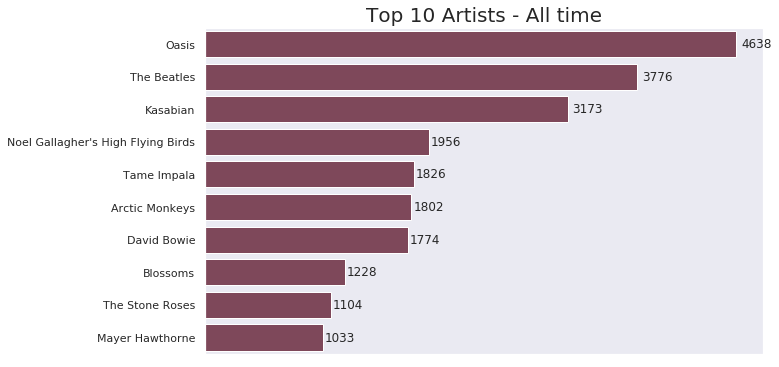

In [3]:
top_artists = Counter(scrobbles_df['Artist'])
top_100_artists = top_artists.most_common(100)

x_artists = [item[0] for item in top_100_artists]
y_artists = [item[1] for item in top_100_artists]

sns.set()
plt.subplots(figsize=(10, 6))

artists_plot = sns.barplot(y_artists[:10], x_artists[:10], color="#873f57")
artists_plot.axes.get_xaxis().set_visible(False)
artists_plot.set_title('Top 10 Artists - All time', fontsize=20)
for p in artists_plot.patches:
    artists_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

    top_albums = Counter(scrobbles_df['Album'])

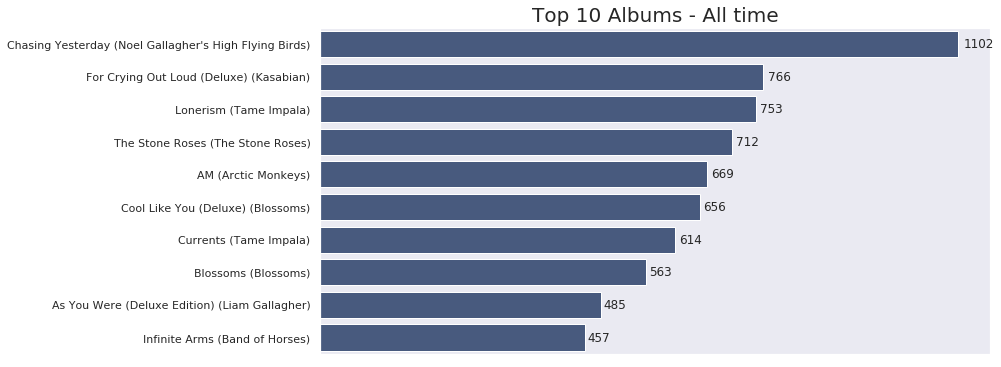

In [4]:
top_albums = Counter(scrobbles_df['Album'])
top_100_albums = top_albums.most_common(100)

x_albums = [item[0] for item in top_100_albums]
y_albums = [item[1] for item in top_100_albums]

x_albums_with_artist = []
for i in range(len(x_albums)):
    try:
        album = x_albums[i]
        artist = scrobbles_df[scrobbles_df.Album == album]['Artist'].mode()[0]
        album_artist = album + " (" + artist + ")"
        x_albums_with_artist.append(album_artist)
    except: x_albums_with_artist.append("nan")

plt.subplots(figsize=(12, 6))
albums_plot = sns.barplot(y_albums[1:11], x_albums_with_artist[1:11], color="#3f5787")
albums_plot.axes.get_xaxis().set_visible(False)
albums_plot.set_title('Top 10 Albums - All time', fontsize=20)
for p in albums_plot.patches:
    albums_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

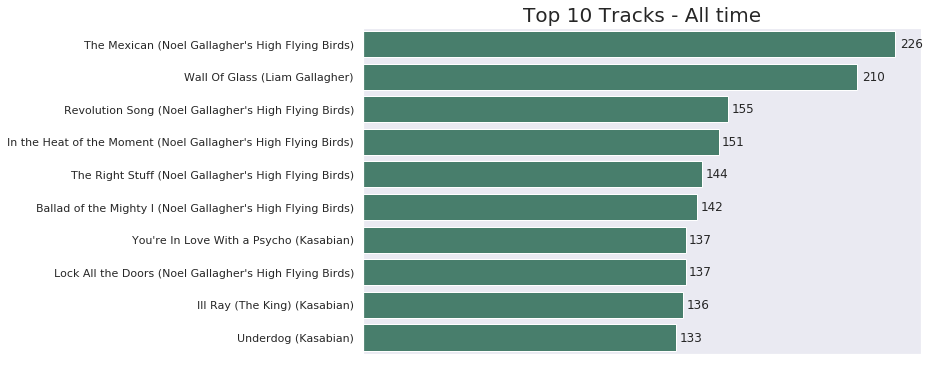

In [5]:
top_tracks = Counter(scrobbles_df['Track'])
top_100_tracks = top_tracks.most_common(100)

x_tracks = [item[0] for item in top_100_tracks]
y_tracks = [item[1] for item in top_100_tracks]


x_tracks_with_artist = []
for i in range(len(x_albums)):
    try:
        track = x_tracks[i]
        artist = scrobbles_df[scrobbles_df.Track == track]['Artist'].mode()[0]
        track_artist = track + " (" + artist + ")"
        x_tracks_with_artist.append(track_artist)
    except: x_tracks_with_artist.append("nan")
        
        
plt.subplots(figsize=(10, 6))
tracks_plot = sns.barplot(y_tracks[:10], x_tracks_with_artist[:10], color="#3f876f")
tracks_plot.axes.get_xaxis().set_visible(False)
tracks_plot.set_title('Top 10 Tracks - All time', fontsize=20)
for p in tracks_plot.patches:
    tracks_plot.text(p.get_width()*1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

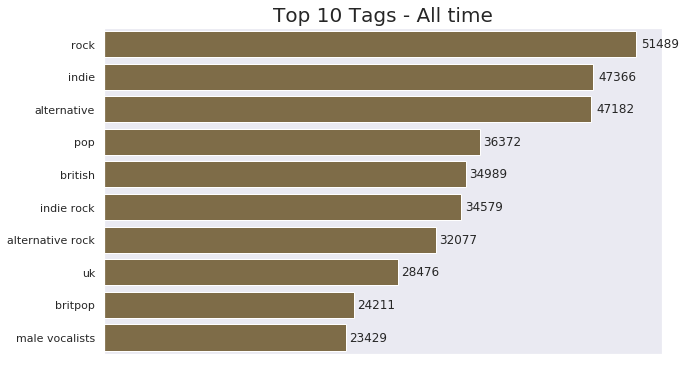

In [6]:
tags_df = scrobbles_df['Tags']
count_tags = {}

for i in range(len(scrobbles_df)):
    str1 = tags_df.iloc[i]
    str1 = str1.replace("[","").replace("]","").replace("'","")
    str1 = str1.split(", ")
    for j in range(len(str1)):
        if str1[j] not in count_tags:
            count_tags[str1[j]] = 1
        elif str1[j] in count_tags:
            count_tags[str1[j]] += 1
            
top_tags = Counter(count_tags)
top_100_tags = top_tags.most_common(100)

x_tags = [item[0] for item in top_100_tags]
y_tags = [item[1] for item in top_100_tags]

plt.subplots(figsize=(10, 6))
tags_plot = sns.barplot(y_tags[:10], x_tags[:10], color="#876f3f")
tags_plot.axes.get_xaxis().set_visible(False)
tags_plot.set_title('Top 10 Tags - All time', fontsize=20)
for p in tags_plot.patches:
    tags_plot.text(p.get_width()*1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

## How obsessed am I?

Let's check the distribution of artists, albums and tracks, to see if I listen too much of one thing in regard os others.

We'll consider just the top 100 of each item, to keep the charts clean.

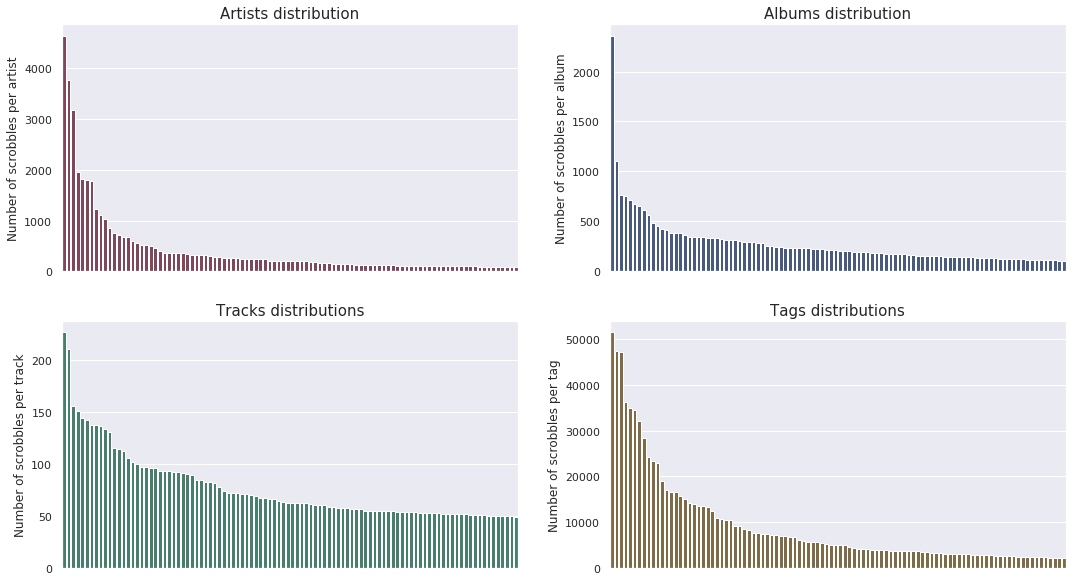

In [7]:
plt.subplots(figsize=(18, 10))

plt.subplot(2, 2, 1)
artists_dist = sns.barplot(x_artists, y_artists, color="#873f57")
artists_dist.set_ylabel("Number of scrobbles per artist")
artists_dist.axes.get_xaxis().set_visible(False)
artists_dist.set_title('Artists distribution', fontsize=15)

plt.subplot(2, 2, 2)
albums_dist = sns.barplot(x_albums_with_artist, y_albums, color="#3f5787")
albums_dist.set_ylabel("Number of scrobbles per album")
albums_dist.axes.get_xaxis().set_visible(False)
albums_dist.set_title('Albums distribution', fontsize=15)

plt.subplot(2, 2, 3)
tracks_dist = sns.barplot(x_tracks_with_artist, y_tracks, color="#3f876f")
tracks_dist.set_ylabel("Number of scrobbles per track")
tracks_dist.axes.get_xaxis().set_visible(False)
tracks_dist.set_title('Tracks distributions', fontsize=15)

plt.subplot(2, 2, 4)
tags_dist = sns.barplot(x_tags, y_tags, color="#876f3f")
tags_dist.set_ylabel("Number of scrobbles per tag")
tags_dist.axes.get_xaxis().set_visible(False)
tags_dist.set_title('Tags distributions', fontsize=15)

plt.show()

So, I have a high concentration of artists and tags (the curves are more dramatic), however the distribution on albums and tracks are smoother. The albums and tracks are more evenly distributed however they are albums from the same artists. (To be studied)

_Soundtrack for this first part of the study: [The Kinks](https://open.spotify.com/user/ohhrosie/playlist/4bW4B1ZAJL2QeVxjmz3K4K?si=gzblx6t9R8OMJL2wgttdjw)_

![Kinks](https://i.imgur.com/KcJd5eQb.png)





## How I listen to music over time

In [8]:
scrobbles_df['Timestamp_index'] = pd.to_datetime(scrobbles_df['Date Spain'],infer_datetime_format=True)
scrobbles_df.set_index('Timestamp_index', inplace=True)

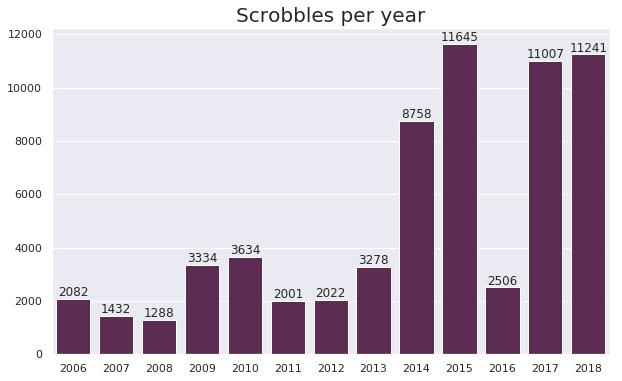

In [9]:
years = [i for i in range(2006, 2019)]
tracks_per_year = [len(scrobbles_df[scrobbles_df.index.year == i]) for i in years]

sns.set()
plt.subplots(figsize=(10, 6))
yearly_tracks = sns.barplot(years, tracks_per_year, color="#642457")
yearly_tracks.set_title('Scrobbles per year', fontsize=20)
for p in yearly_tracks.patches:
    yearly_tracks.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

In [10]:
scrobbles_df['Weekday'] = [datetime.date(idx.year, idx.month, idx.day).strftime('%A') for idx in scrobbles_df.index]
scrobbles_df['Weekday_number'] = [datetime.date(idx.year, idx.month, idx.day).isoweekday() for idx in scrobbles_df.index]
scrobbles_df['Hour'] = [idx.hour for idx in scrobbles_df.index]
scrobbles_df['Month'] = [idx.month for idx in scrobbles_df.index]
scrobbles_df['Year'] = [idx.year for idx in scrobbles_df.index]

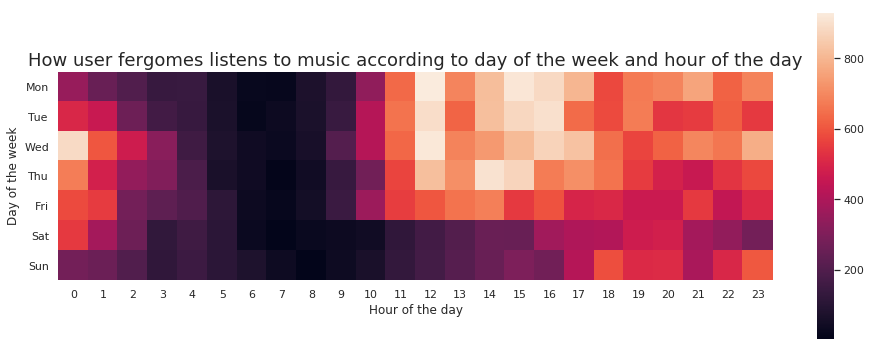

In [11]:
matrix_hour_weekday = scrobbles_df.pivot_table(index='Weekday_number', 
               columns='Hour',
               aggfunc='size',
               fill_value=0)

f, ax = plt.subplots(figsize=(16, 6))
heatmat_hour_weekday = sns.heatmap(matrix_hour_weekday, square=True,
                                   yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
title = 'How user ' + str(user) + ' listens to music according to day of the week and hour of the day'
heatmat_hour_weekday.set_title(title, fontsize=18)
plt.yticks(rotation=0)
plt.xlabel("Hour of the day")
plt.ylabel("Day of the week")
plt.show()

_Soundtrack for this first part of the study: [The Blossoms](https://open.spotify.com/album/0yO5Mwu2oDdGbeRFpAaBGa?si=yxsQbO8eStmMsBK7eDVvMA)_

![Blossoms](https://i.imgur.com/KHt35a8b.jpg)

### Last week and Last month comparisons

In [12]:
scrobbles_df['Timestamp'] = pd.to_datetime(scrobbles_df['Date Spain'],infer_datetime_format=True)

In [13]:
import datetime

today = scrobbles_df.iloc[0]['Timestamp']

week = datetime.timedelta(days=7)
last_week = today - week
two_weeks_ago = last_week - week

In [14]:
last_week_scrobbles = scrobbles_df[scrobbles_df.Timestamp > last_week]

two_weeks_ago_scrobbles = scrobbles_df[scrobbles_df.Timestamp < last_week]
two_weeks_ago_scrobbles = two_weeks_ago_scrobbles[two_weeks_ago_scrobbles.Timestamp > two_weeks_ago]

weekly_scrobbles = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_scrobbles),
                    last_week.strftime('%m/%d'): len(last_week_scrobbles)}

In [15]:
last_week_artists = pd.unique(last_week_scrobbles['Artist'])
two_weeks_ago_artists = pd.unique(two_weeks_ago_scrobbles['Artist'])

weekly_artists = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_artists),
                  last_week.strftime('%m/%d'): len(last_week_artists)}

In [16]:
last_week_albums = pd.unique(last_week_scrobbles['Album'])
two_weeks_ago_albums = pd.unique(two_weeks_ago_scrobbles['Album'])

weekly_albums = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_albums),
                 last_week.strftime('%m/%d'): len(last_week_albums)}

Text(0.5, 1.0, '# of albums - WoW')

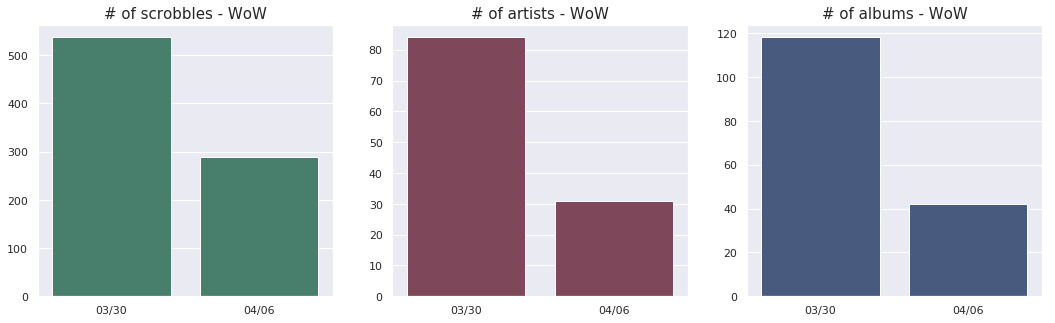

In [21]:
plt.subplots(figsize=(18, 5))

plt.subplot(1, 3, 1)
lists = weekly_scrobbles.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#3f876f")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of scrobbles - WoW', fontsize=15)

plt.subplot(1, 3, 2)
lists = weekly_artists.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#873f57")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of artists - WoW', fontsize=15)

plt.subplot(1, 3, 3)
lists = weekly_albums.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#3f5787")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of albums - WoW', fontsize=15)

In [17]:
month = datetime.timedelta(days=30)
last_month = today - month
two_months_ago = last_month - month

In [18]:
last_month_scrobbles = scrobbles_df[scrobbles_df.Timestamp > last_month]

two_months_ago_scrobbles = scrobbles_df[scrobbles_df.Timestamp < last_month]
two_months_ago_scrobbles = two_months_ago_scrobbles[two_months_ago_scrobbles.Timestamp > two_months_ago]

monthly_scrobbles = {two_months_ago.strftime('%m/%d'): len(two_months_ago_scrobbles),
                     last_month.strftime('%m/%d'): len(last_month_scrobbles)}

In [19]:
last_month_artists = pd.unique(last_month_scrobbles['Artist'])
two_months_ago_artists = pd.unique(two_months_ago_scrobbles['Artist'])

monthly_artists = {two_months_ago.strftime('%m/%d'): len(two_months_ago_artists),
                   last_month.strftime('%m/%d'): len(last_month_artists)}

In [20]:
last_month_albums = pd.unique(last_month_scrobbles['Album'])
two_months_ago_albums = pd.unique(two_months_ago_scrobbles['Album'])

monthly_albums = {two_months_ago.strftime('%m/%d'): len(two_months_ago_albums),
                  last_month.strftime('%m/%d'): len(last_month_albums)}

Text(0.5, 1.0, '# of albums - MoM')

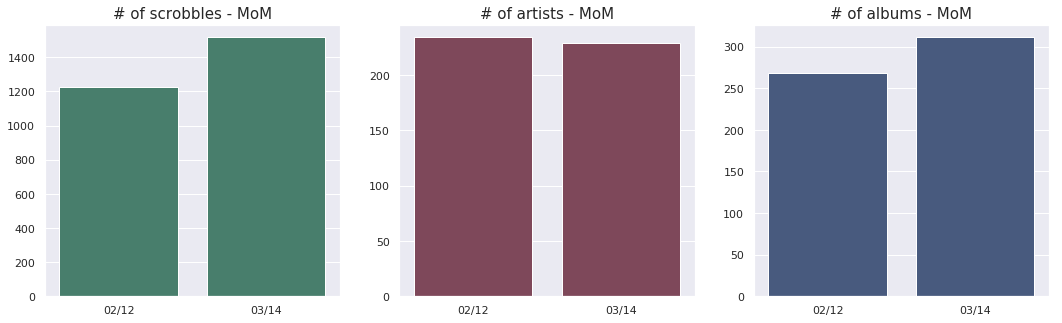

In [22]:
plt.subplots(figsize=(18, 5))

plt.subplot(1, 3, 1)
lists = monthly_scrobbles.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#3f876f")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of scrobbles - MoM', fontsize=15)

plt.subplot(1, 3, 2)
lists = monthly_artists.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#873f57")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of artists - MoM', fontsize=15)

plt.subplot(1, 3, 3)
lists = monthly_albums.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#3f5787")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of albums - MoM', fontsize=15)

In [23]:
list_short = ["uk", "mpb", "pop", "20s", "30s","40s", "50s", "60s", "70s", "80s", "90s", "00s", "10s", 
              "emo", "mod", "rap", "rnb", "usa", "dub", "ska", "r&b", "idm", "edm",]
all_tags = []

for i in range(len(scrobbles_df)):
    tagg = scrobbles_df['Tags'][i].replace("[","").replace("]","").replace("'","")
    tag_list = tagg.split(", ")
    for j in tag_list:
        if len(j) > 3 or j in list_short:
            if j not in all_tags:
                all_tags.append(j)

In [24]:
def make_list_from_string(string):
    return string.replace("[","").replace("]","").replace("'","").split(", ")
    
def make_user_interest_vector(user_interests):
    """ given a list of interests, produce a vector whose ith element iss 1
    if unique_interests[i] is in the list, 0 otherwise """
    return [1 if interest in user_interests else 0
            for interest in all_tags]


In [25]:
supreme_list_tags_vector = []

for i in range(len(scrobbles_df)):
    list_tags = make_list_from_string(scrobbles_df['Tags'][i])
    tag_vector = make_user_interest_vector(list_tags)
    supreme_list_tags_vector.append(tag_vector)  


In [26]:
scrobbles_df['TagsVector'] = supreme_list_tags_vector

_Soundtrack for this first part of the study: [Band of Horses](https://open.spotify.com/album/08fkw9uDP2KET6cPIl74Xo?si=YedcmWXjSuKg4ddN5saUfQ)_

![Band of Horses](https://i.imgur.com/r9aLICc.jpg?1)